In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
l = 26.5 * 0.01
SN = 3000 * 0.0001
U = 800
epsphi = 0.01
r = 5
sigmaU = 25
epstok = 0.005

In [2]:
magnet = pd.read_csv('magneticflux.csv')
magnet['Phi'] = magnet['Phi'] * 0.001
magnet

,U,I,Phi
0,5.2,0.81,0.0008
1,10.5,1.64,0.0016
2,15.5,2.45,0.0024
3,20.5,3.28,0.0034
4,25.5,4.07,0.0042
5,30.5,4.85,0.0051


In [3]:
x = list(magnet['I'])
sigmax = [x[i] * 0.005 for i in range(len(x))]
y = list(magnet['Phi'])
xy = []
for i in range (len(x)):
    xy.append(x[i] * y[i])
x2 = []
for i in range (len(x)):
    x2.append(x[i] * x[i])
y2 = []
for i in range (len(x)):
    y2.append(y[i] * y[i])

In [4]:
def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata=x, ydata=y)
print(params[0]/SN)

0.003565756167100474


In [5]:
k = sum(xy) / sum(x2)
sigmak = (1/math.sqrt(len(x))) * math.sqrt((sum(y2)/sum(x2)) - k*k)
print(k/SN)

0.003440708376250124


In [6]:
k = k / SN
sigmak = sigmak / SN
k, sigmak, 

(0.003440708376250124, 3.306624263441959e-05)

In [7]:
for i in range (len(y)):
    y[i] = y[i] / SN
sigmay = [y[i] * epsphi for i in range (len(y))]

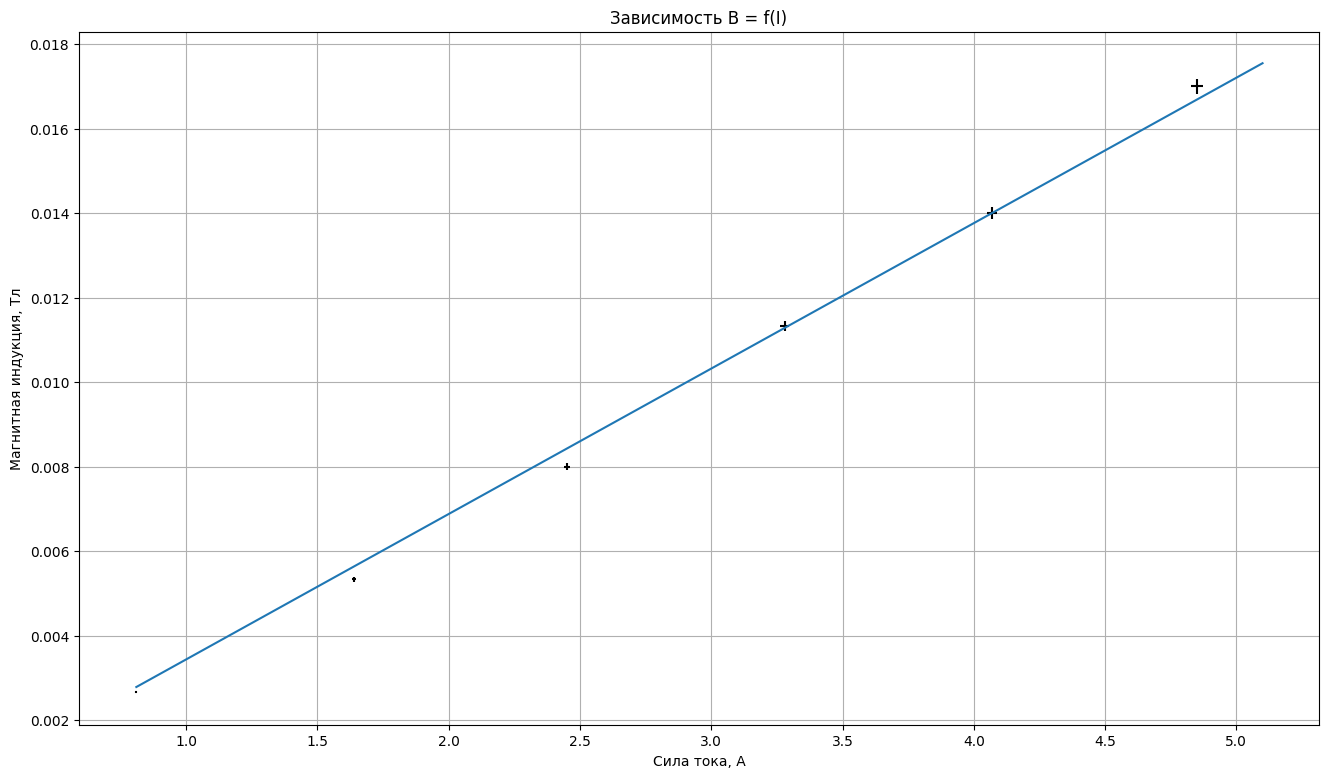

In [8]:
x1 = [x[0], 5.1]
y1 = []
for i in range(2):
    y1.append(x1[i] * k)
fig, ax = plt.subplots(figsize = (16,9))
plt.title('Зависимость B = f(I)')
plt.xlabel('Сила тока, A')
plt.ylabel('Магнитная индукция, Тл')
plt.errorbar(x, y, c='black', xerr = sigmax, yerr = sigmay, fmt = 'None')
plt.xticks([1 + i * 0.5 for i in range (9)])
plt.grid(which='both')
plt.plot(x1,y1)
plt.show()

In [9]:
ps = pd.read_csv('pointsstraight.csv')
pr = pd.read_csv('pointsreverse.csv')
I = [(ps['I'][i] + pr['I'][i])/2 for i in range (len(ps))]
B = [I[i] * k for i in range (len(I))]
sigmaB = []
for i in range (len(B)):
    sigmaB.append(B[i]*(epstok**2 + (sigmak/k)**2)**(1/2))
n = [i for i in range (len(B))]
print(sigmaB)

[2.2550665951724365e-05, 4.752413072470837e-05, 7.380217947837064e-05, 0.00010063933565232361, 0.00012542643128521074, 0.00014834983551712888]


In [10]:
def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata=n, ydata=B)
kphi = params[0]
sigmakphi = math.sqrt(cov[0][0])
print(kphi, sigmakphi, params[1], math.sqrt(cov[1][1]))

0.0023460715823728803 2.7822495301121195e-05 0.0021086627060896493 8.423678690053426e-05


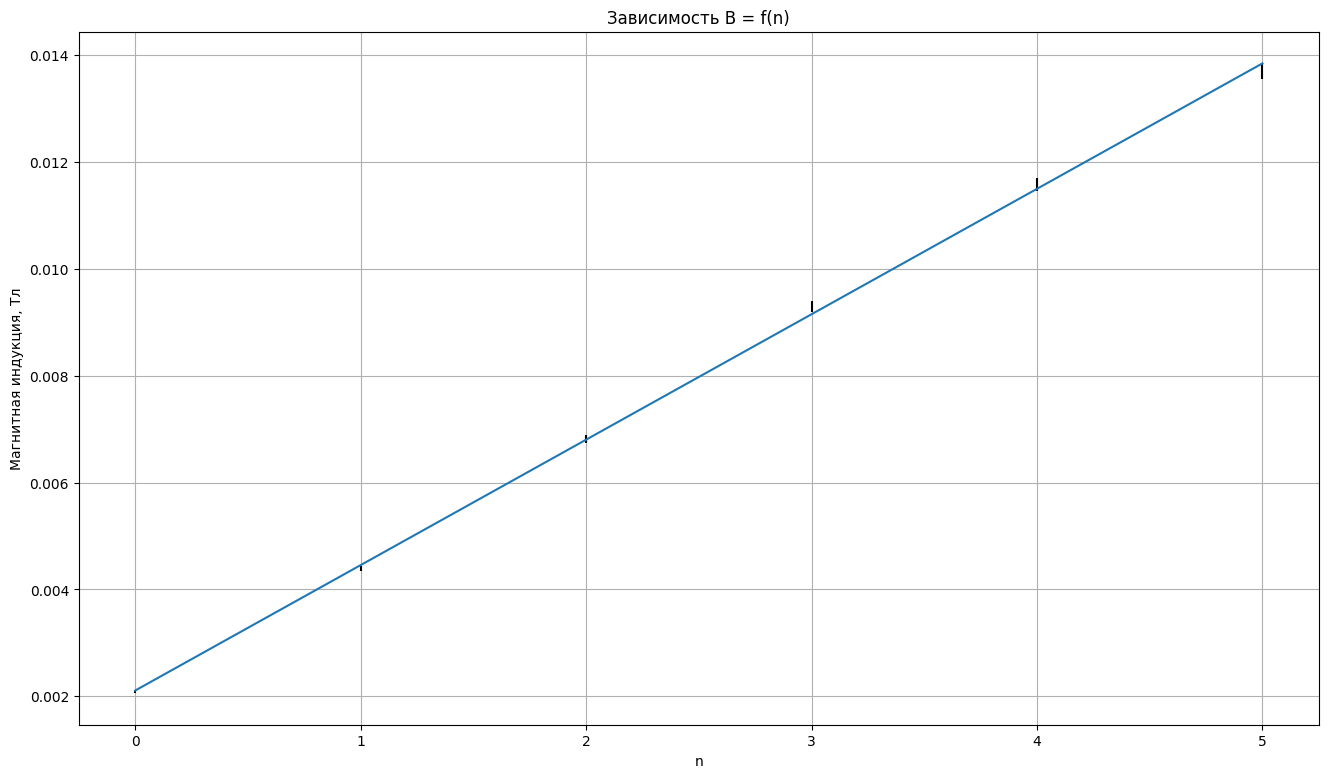

In [11]:
x1 = [i for i in range (6)]
y1 = [kphi * x1[i] + params[1] for i in range (6)]
fig, ax = plt.subplots(figsize = (16,9))
plt.title('Зависимость B = f(n)')
plt.xlabel('n')
plt.ylabel('Магнитная индукция, Тл')
plt.grid()
plt.errorbar(n, B, c='black', yerr = sigmaB, fmt = 'None')
plt.plot(x1,y1)
plt.show()

In [12]:
em = (8*math.pi**2*U)/(l**2)*(1/kphi**2)
sigmaem = em*((sigmaU/U)**2 + 4*(sigmakphi/kphi)**2)**(1/2)
print(em/10**11, sigmaem/10**11)

1.6342009307217844 0.06411242286057309
